## Notebook para analise exploratória e estatistica dos dados de "ECONOMY" extraidos do site VLR.GG

In [121]:
## Import functions for Data Scraping, Treatment and Plotting

## System
import re
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## EDA
import numpy as np
import pandas as pd

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [122]:
## IMPORT DATA FROM CSV FILE
def ImportData(team_file):

    folder = team_file + '/'
    maps_file = team_file + '_performance_MAPS.csv'
    matches_file = team_file + '_performance_MATCHES.csv'
    
    maps = pd.read_csv(CSV_PATH + folder + maps_file)
    matches = pd.read_csv(CSV_PATH + folder + matches_file)
 
    return maps, matches

def AllTeamsMaps(files, teams):
    concat = pd.concat([ImportData(team_file)[0] for team_file in files])
    filter = FilterTeam(concat, teams)
    filter.Team[filter.Team == 'NOOR'] = 'paiN'
    filter.Team[filter.Team == 'Mix'] = 'IMP'
    filter.Team[filter.Team == 'NMDM'] = 'Inga'
    filter.Team[filter.Team == 'FF'] = 'VORA'
    return filter

def AllTeamsMatches(files, teams):
    concat = pd.concat([ImportData(team_file)[1] for team_file in files])
    filter = FilterTeam(concat, teams)
    filter.Team[filter.Team == 'NOOR'] = 'paiN'
    filter.Team[filter.Team == 'Mix'] = 'IMP'
    filter.Team[filter.Team == 'NMDM'] = 'Inga'
    filter.Team[filter.Team == 'FF'] = 'VORA'
    return filter

def Preprocessamento(team, team_file):
    ## Import data
    maps, matches = ImportData(team_file)

    ## Filter Team
    matches = FilterTeam(matches, team)
    maps = FilterTeam(maps, team)

    ## Padrozinar nome do time
    maps.Team  = team_file
    matches.Team  = team_file

    return maps, matches

## FILTER FUNCTIONS BY GIVEN TEAM/OPPONENT/MAP/PLAYER

def FilterTeam(df, teams):
    return df[df["Team"].isin(teams)].reset_index(drop=True)

def FilterOppTeam(df, opp_teams):
    return df[df["Opp_Team"].isin(opp_teams)].reset_index(drop=True)

def FilterMap(df, maps):
    return df[df["Map"].isin(maps)].reset_index(drop=True)

def FilterPlayer(df, players):
    return df[df["Player"].isin(players)].reset_index(drop=True)



##----------------------PLOT FUNCS

# Box Plot of Econ by Map
def BoxplotPerfMap(df, perf_col):
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=df['Map'], y=df[perf_col], order=df['Map'].sort_values().unique())

# Box Plot of Econ by Opponent
def BoxplotPerfOpp(df, perf_col):
    df = FilterOppTeam(df, ALL_TEAMS)
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=df['Opp_team'], y=df[perf_col], order=df['Opp_team'].sort_values().unique())
    
# Histogram of Performance by Opponent
def HistPerfMap(df, perf_col):
    df = FilterOppTeam(df, ALL_TEAMS)
    g = sns.displot(data=df, x=perf_col, col='Opp_team', kde=True)
    g.set_titles("{col_name}")
    
# Histogram of Performance by map
def HistPerfMap(df, perf_col):
    g = sns.displot(data=df, x=perf_col, col='Map', kde=True)
    g.set_titles("{col_name}")

In [123]:
## TEAMS: 'IMP', 'paiN', 'NOOR', 'FF', 'BD', 'GL', 'HAVA', 'Mix'
## team_files: gamlanders, pain, vorax, havan, imperial, ingaming, vikings, black_dragons
CSV_PATH = '../data/csv/'
EXCEL_PATH = '..data/excel/'

TEAM = ['HAVA']
TEAM_FILE = 'havan'

ALL_FILES = ['gamelanders', 'pain', 'vorax', 'havan', 'imperial', 'ingaming', 'vikings', 'black_dragons']
ALL_TEAMS = ['GL', 'IMP', 'Mix' 'HAVA', 'Inga', 'NMDM', 'VKS', 'FF', 'VORA', 'BD', 'paiN', 'NOOR']

MAPS = ['ASCENT', 'BIND', 'HAVEN', 'ICEBOX', 'SPLIT']

---

In [124]:
all_maps = AllTeamsMaps(ALL_FILES, ALL_TEAMS)
all_matches = AllTeamsMatches(ALL_FILES, ALL_TEAMS)

In [125]:
filter_opp = FilterOppTeam(all_maps, ALL_TEAMS)

In [126]:
all_maps

,Player,2K,3K,4K,5K,1v1,1v2,1v3,1v4,1v5,ECON,PL,DE,match_id,Team,Opp_Team,Map,Patch
0,Nyang,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30,0,1,6797,GL,IMP,SPLIT,1.12
1,fznnn,3,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,31,0,0,6797,GL,IMP,SPLIT,1.12
2,JhoW,3,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,38,3,0,6797,GL,IMP,SPLIT,1.12
3,Jonn,6,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,115,0,0,6797,GL,IMP,SPLIT,1.12
4,mwzera,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0,0,6797,GL,IMP,SPLIT,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,fooX,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,44,0,0,2957,BD,Gala,ASCENT,1.08
1491,PryZee,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43,2,0,2957,BD,Gala,ASCENT,1.08
1492,rhz,4,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62,6,1,2957,BD,Gala,ASCENT,1.08
1493,RoY,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,1,0,2957,BD,Gala,ASCENT,1.08


In [89]:
maps, matches = Preprocessamento(TEAM, TEAM_FILE)

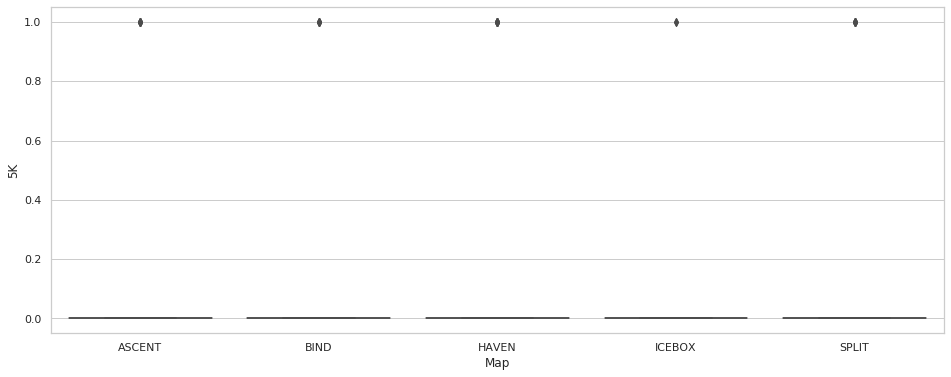

In [115]:
BoxplotPerfMap(all_maps, '5K')